Encoding categorical columns: ['Protocol', 'Direction', 'DDoS_Label']
Epoch 1/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.2557 - loss: 1.3926 - val_accuracy: 0.2966 - val_loss: 1.3760
Epoch 2/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2755 - loss: 1.3781 - val_accuracy: 0.3764 - val_loss: 1.3634
Epoch 3/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.3193 - loss: 1.3678 - val_accuracy: 0.3977 - val_loss: 1.3539
Epoch 4/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.3356 - loss: 1.3602 - val_accuracy: 0.3691 - val_loss: 1.3451
Epoch 5/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3536 - loss: 1.3447 - val_accuracy: 0.3922 - val_loss: 1.3336
Epoch 6/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3714 - loss: 1.3323 - val_accuracy: 0.4367 - val_loss: 1.3230
Epoch 7/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3934 - loss: 1.3188 - val_accuracy: 0.4147 - val_loss: 1.3100
Epoch 8/30
206/206 ━━━━━━━━━━━━━━

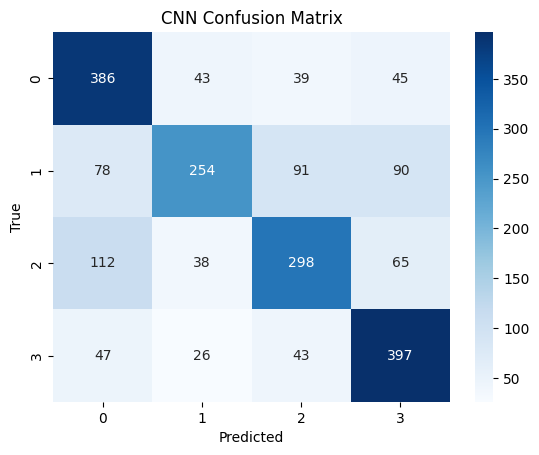


Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.75      0.68       513
           1       0.70      0.50      0.58       513
           2       0.63      0.58      0.61       513
           3       0.66      0.77      0.72       513

    accuracy                           0.65      2052
   macro avg       0.66      0.65      0.65      2052
weighted avg       0.66      0.65      0.65      2052


Random Forest Performance:
Accuracy:  0.9786
Precision: 0.9786
Recall:    0.9786
F1 Score:  0.9786

Confusion Matrix:
[[497   2   1  13]
 [  5 504   1   3]
 [  2   0 507   4]
 [  2   5   6 500]]


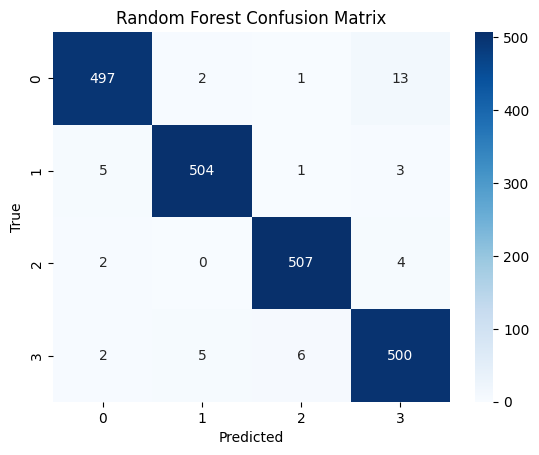


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       513
           1       0.99      0.98      0.98       513
           2       0.98      0.99      0.99       513
           3       0.96      0.97      0.97       513

    accuracy                           0.98      2052
   macro avg       0.98      0.98      0.98      2052
weighted avg       0.98      0.98      0.98      2052


XGBoost Performance:
Accuracy:  0.9698
Precision: 0.9698
Recall:    0.9698
F1 Score:  0.9698

Confusion Matrix:
[[491  14   3   5]
 [  2 499   3   9]
 [  3   2 506   2]
 [  9   4   6 494]]


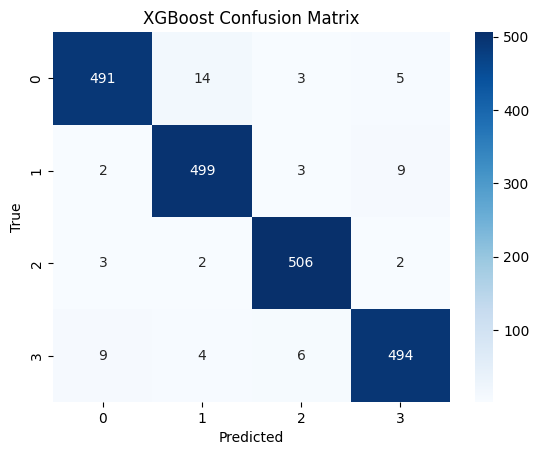


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       513
           1       0.96      0.97      0.97       513
           2       0.98      0.99      0.98       513
           3       0.97      0.96      0.97       513

    accuracy                           0.97      2052
   macro avg       0.97      0.97      0.97      2052
weighted avg       0.97      0.97      0.97      2052


Ensemble RF + CNN Performance:
Accuracy:  0.9786
Precision: 0.9786
Recall:    0.9786
F1 Score:  0.9786

Confusion Matrix:
[[497   2   1  13]
 [  5 504   1   3]
 [  2   0 507   4]
 [  2   5   6 500]]


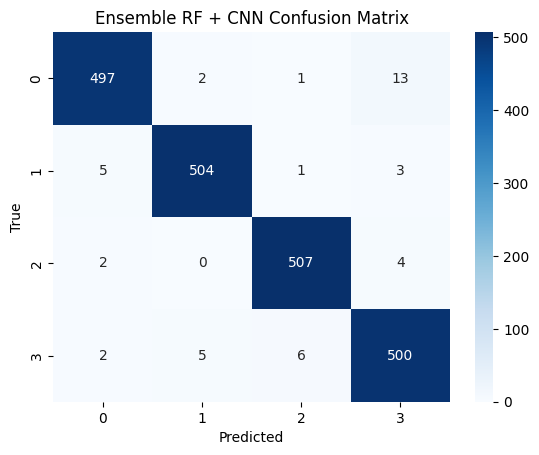


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       513
           1       0.99      0.98      0.98       513
           2       0.98      0.99      0.99       513
           3       0.96      0.97      0.97       513

    accuracy                           0.98      2052
   macro avg       0.98      0.98      0.98      2052
weighted avg       0.98      0.98      0.98      2052


Ensemble XGB + CNN Performance:
Accuracy:  0.9698
Precision: 0.9698
Recall:    0.9698
F1 Score:  0.9698

Confusion Matrix:
[[491  14   3   5]
 [  2 499   3   9]
 [  3   2 506   2]
 [  9   4   6 494]]


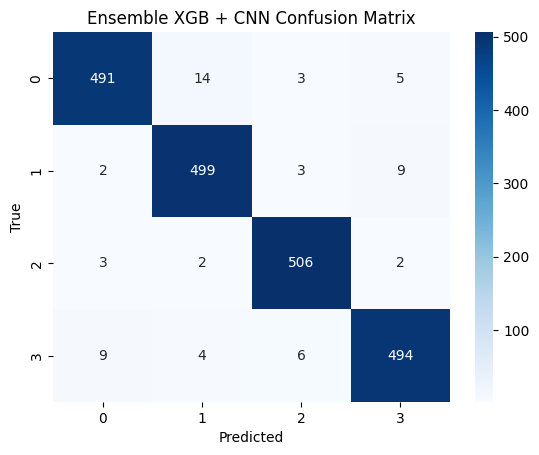


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       513
           1       0.96      0.97      0.97       513
           2       0.98      0.99      0.98       513
           3       0.97      0.96      0.97       513

    accuracy                           0.97      2052
   macro avg       0.97      0.97      0.97      2052
weighted avg       0.97      0.97      0.97      2052



In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load dataset
data = pd.read_csv('iot_network_analysis_dataset_10000.csv')

# Handle string target label
if data['Label'].dtype == 'object':
    label_encoder = LabelEncoder()
    data['Label'] = label_encoder.fit_transform(data['Label'])

# Split features and target
X = data.drop('Label', axis=1)
y = data['Label']

# Convert bool to int if present
for col in X.columns:
    if X[col].dtype == 'bool':
        X[col] = X[col].astype(int)

# Encode categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    print("Encoding categorical columns:", list(categorical_cols))
    X = pd.get_dummies(X, columns=categorical_cols)

# Handle class imbalance
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Prepare CNN input
X_train_cnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_cnn = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)
y_train_cnn = to_categorical(y_train)
y_test_cnn = to_categorical(y_test)

# Build CNN
def build_cnn(input_shape, num_classes):
    model = Sequential()
    model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(128, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer=Adam(0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

cnn_model = build_cnn((X_train_cnn.shape[1], 1), y_train_cnn.shape[1])
history=cnn_model.fit(X_train_cnn, y_train_cnn, epochs=30, batch_size=32, validation_split=0.2, verbose=1)

# CNN Prediction
cnn_probs = cnn_model.predict(X_test_cnn)
cnn_preds = np.argmax(cnn_probs, axis=1)

# Train RF and XGBoost
rf_model = RandomForestClassifier(n_estimators=300, max_depth=30, random_state=42)
xgb_model = XGBClassifier(n_estimators=300, learning_rate=0.1, max_depth=5, use_label_encoder=False, eval_metric='mlogloss')

rf_model.fit(X_train_scaled, y_train)
xgb_model.fit(X_train_scaled, y_train)

# Predict RF/XGB
rf_preds = rf_model.predict(X_test_scaled)
xgb_preds = xgb_model.predict(X_test_scaled)

# Weighted Ensemble: CNN + RF
rf_cnn_ensemble = np.round(0.9 * rf_preds + 0.1* cnn_preds).astype(int)

# Weighted Ensemble: CNN + XGBoost
xgb_cnn_ensemble = np.round(0.9* xgb_preds + 0.1* cnn_preds).astype(int)

# Evaluation Function
def evaluate_model(name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='weighted')
    rec = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    print(f"\n{name} Performance:")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1 Score:  {f1:.4f}")
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

# Evaluate all models
evaluate_model("CNN", y_test, cnn_preds)
evaluate_model("Random Forest", y_test, rf_preds)
evaluate_model("XGBoost", y_test, xgb_preds)
evaluate_model("Ensemble RF + CNN", y_test, rf_cnn_ensemble)
evaluate_model("Ensemble XGB + CNN", y_test, xgb_cnn_ensemble)



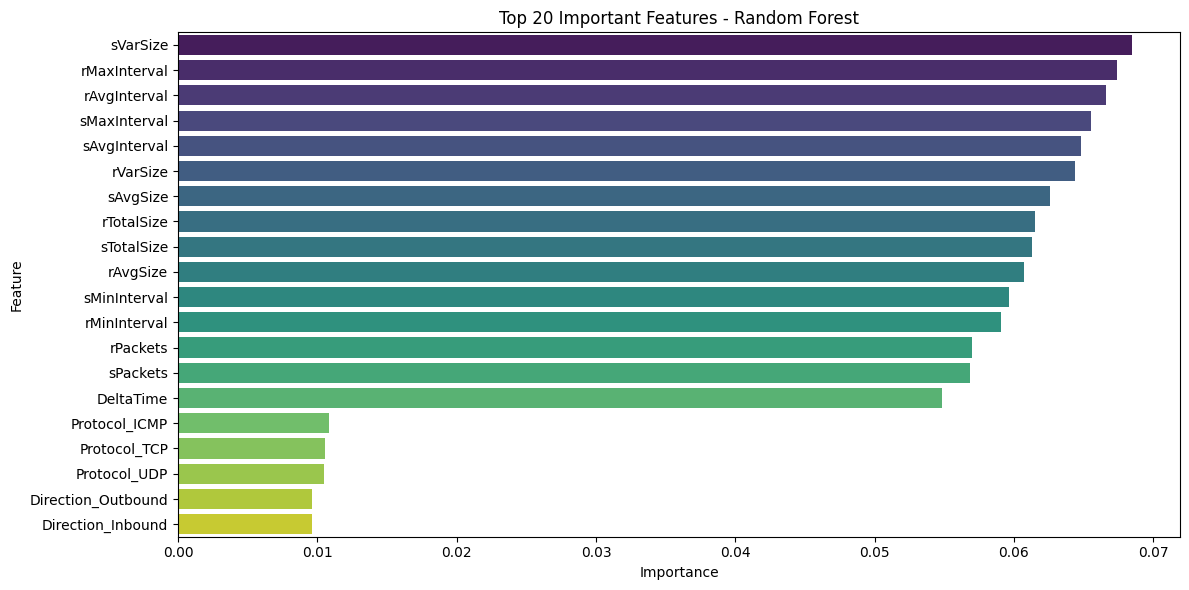

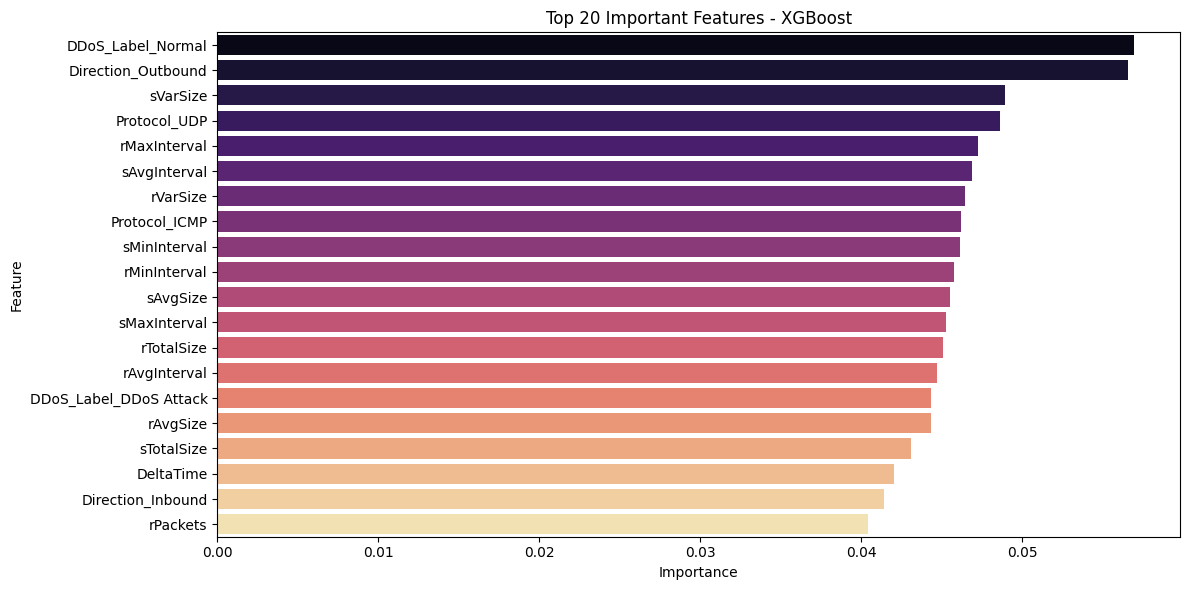

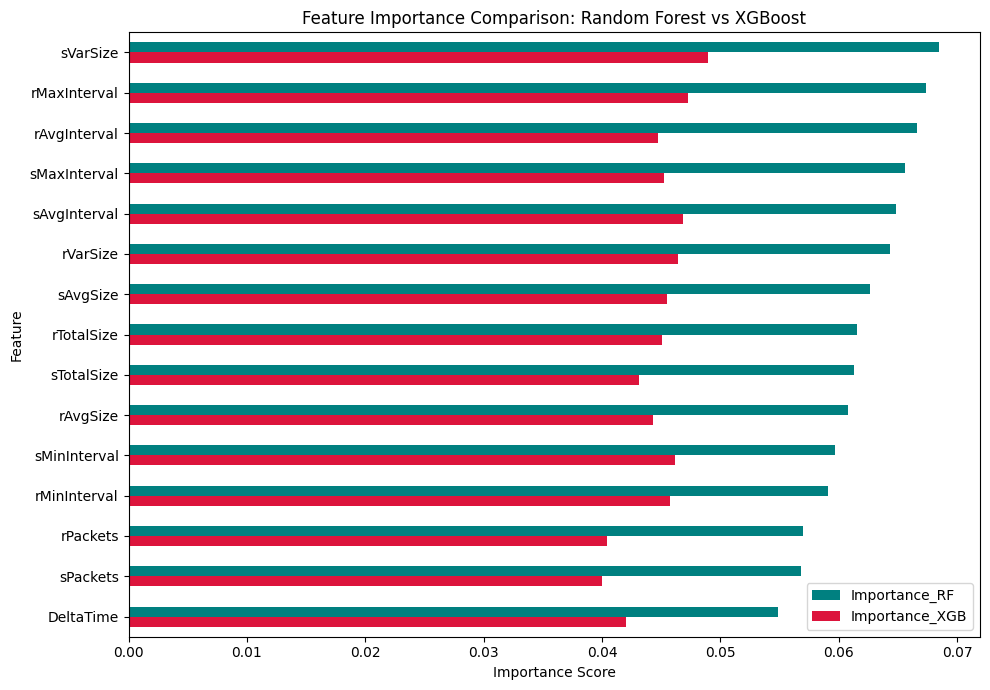

In [ ]:
# Get feature importances from Random Forest
rf_importances = rf_model.feature_importances_
rf_features = X.columns

# Create DataFrame and sort
rf_df = pd.DataFrame({'Feature': rf_features, 'Importance': rf_importances})
rf_df = rf_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=rf_df.head(20), x='Importance', y='Feature', palette='viridis')
plt.title('Top 20 Important Features - Random Forest')
plt.tight_layout()
plt.show()
# Get feature importances from XGBoost
xgb_importances = xgb_model.feature_importances_
xgb_features = X.columns

# Create DataFrame and sort
xgb_df = pd.DataFrame({'Feature': xgb_features, 'Importance': xgb_importances})
xgb_df = xgb_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=xgb_df.head(20), x='Importance', y='Feature', palette='magma')
plt.title('Top 20 Important Features - XGBoost')
plt.tight_layout()
plt.show()
# Merge top 15 from both models for comparison
merged_df = pd.merge(rf_df, xgb_df, on='Feature', suffixes=('_RF', '_XGB'))
merged_df = merged_df.sort_values(by='Importance_RF', ascending=False).head(15)

# Plot comparison
merged_df.plot(kind='barh', x='Feature', figsize=(10, 7),
               y=['Importance_RF', 'Importance_XGB'],
               color=['teal', 'crimson'])
plt.xlabel('Importance Score')
plt.title('Feature Importance Comparison: Random Forest vs XGBoost')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


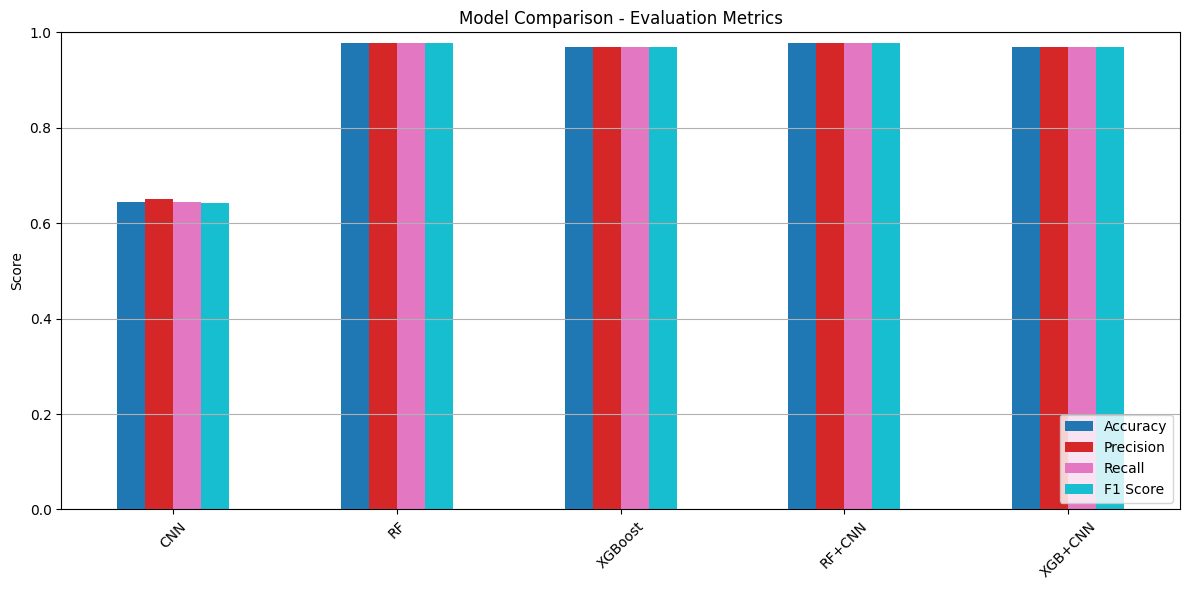

In [ ]:
# Collect metrics
model_names = ['CNN', 'RF', 'XGBoost', 'RF+CNN', 'XGB+CNN']
predictions = [cnn_preds, rf_preds, xgb_preds, rf_cnn_ensemble, xgb_cnn_ensemble]

metrics = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

for preds in predictions:
    metrics['Accuracy'].append(accuracy_score(y_test, preds))
    metrics['Precision'].append(precision_score(y_test, preds, average='weighted'))
    metrics['Recall'].append(recall_score(y_test, preds, average='weighted'))
    metrics['F1 Score'].append(f1_score(y_test, preds, average='weighted'))

# Plot metrics
df_metrics = pd.DataFrame(metrics, index=model_names)
df_metrics.plot(kind='bar', figsize=(12, 6), colormap='tab10')
plt.title("Model Comparison - Evaluation Metrics")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


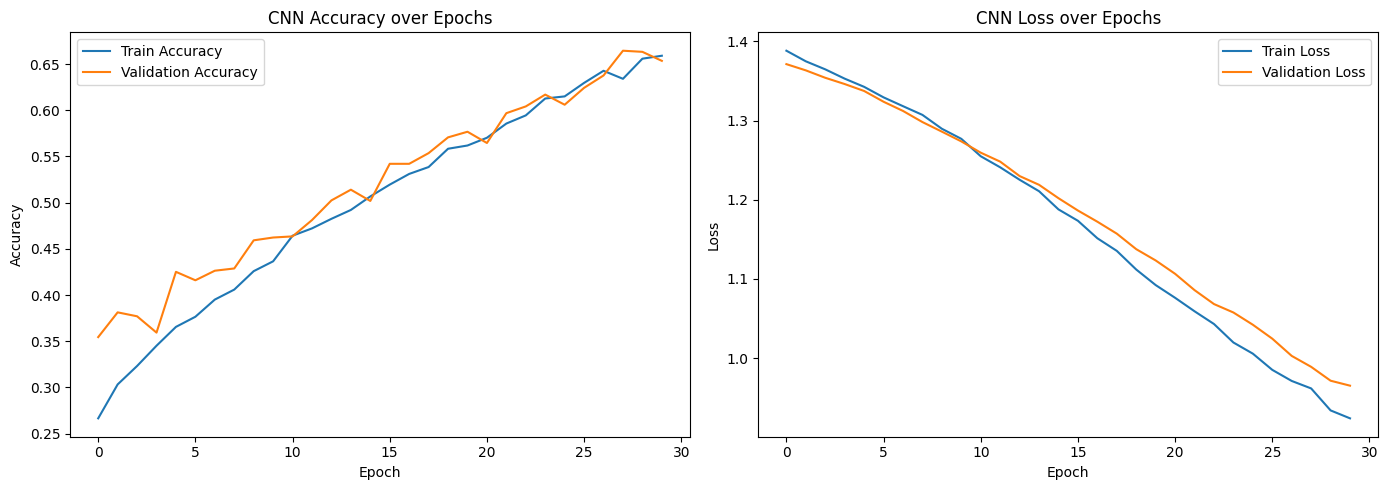

In [ ]:
# Plot training & validation accuracy and loss
plt.figure(figsize=(14, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Encoding categorical columns: ['Protocol', 'Direction', 'DDoS_Label']
Epoch 1/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.2662 - loss: 1.3893 - val_accuracy: 0.2838 - val_loss: 1.3804
Epoch 2/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2897 - loss: 1.3780 - val_accuracy: 0.3216 - val_loss: 1.3704
Epoch 3/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3225 - loss: 1.3663 - val_accuracy: 0.3624 - val_loss: 1.3601
Epoch 4/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3339 - loss: 1.3575 - val_accuracy: 0.3770 - val_loss: 1.3494
Epoch 5/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.3458 - loss: 1.3564 - val_accuracy: 0.3812 - val_loss: 1.3394
Epoch 6/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.3731 - loss: 1.3380 - val_accuracy: 0.4026 - val_loss: 1.3328
Epoch 7/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.3915 - loss: 1.3282 - val_accuracy: 0.4172 - val_loss: 1.3217
Epoch 8/30
206/206 ━━━━━━━━━━━━━━━

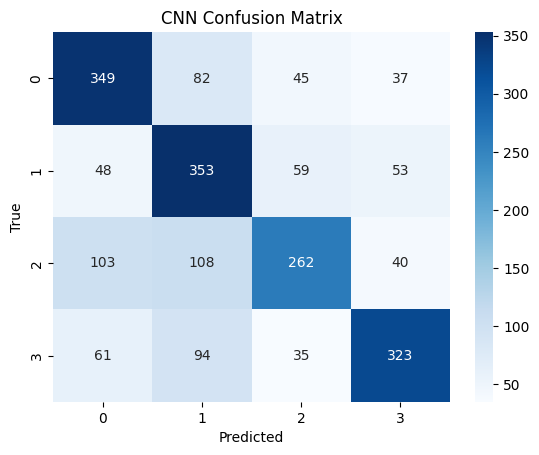


Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.68      0.65       513
           1       0.55      0.69      0.61       513
           2       0.65      0.51      0.57       513
           3       0.71      0.63      0.67       513

    accuracy                           0.63      2052
   macro avg       0.64      0.63      0.63      2052
weighted avg       0.64      0.63      0.63      2052


Random Forest Performance:
Accuracy:  0.9786
Precision: 0.9786
Recall:    0.9786
F1 Score:  0.9786

Confusion Matrix:


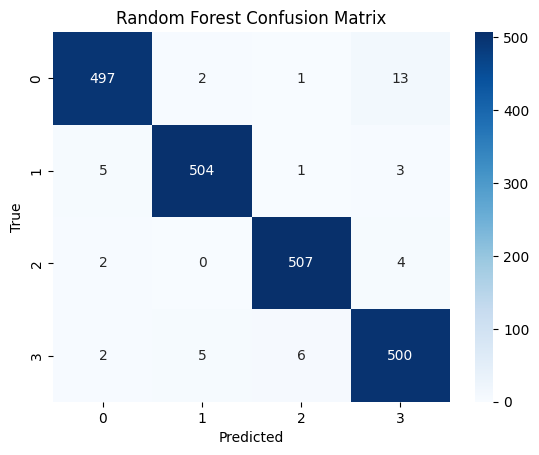


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       513
           1       0.99      0.98      0.98       513
           2       0.98      0.99      0.99       513
           3       0.96      0.97      0.97       513

    accuracy                           0.98      2052
   macro avg       0.98      0.98      0.98      2052
weighted avg       0.98      0.98      0.98      2052


XGBoost Performance:
Accuracy:  0.9698
Precision: 0.9698
Recall:    0.9698
F1 Score:  0.9698

Confusion Matrix:


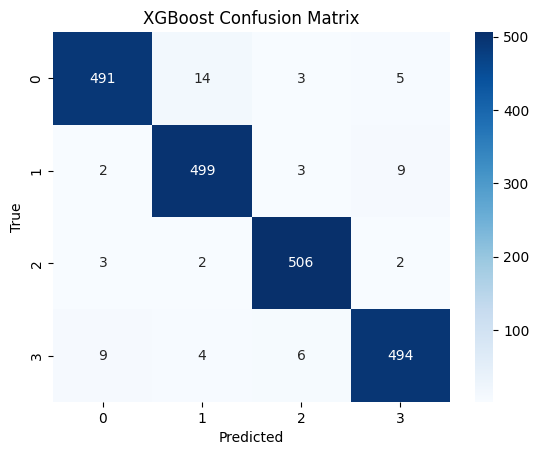


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       513
           1       0.96      0.97      0.97       513
           2       0.98      0.99      0.98       513
           3       0.97      0.96      0.97       513

    accuracy                           0.97      2052
   macro avg       0.97      0.97      0.97      2052
weighted avg       0.97      0.97      0.97      2052


Ensemble RF + CNN (Soft Voting) Performance:
Accuracy:  0.9781
Precision: 0.9781
Recall:    0.9781
F1 Score:  0.9781

Confusion Matrix:


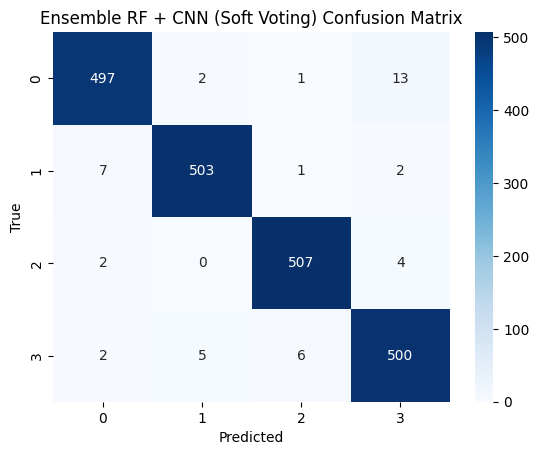


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       513
           1       0.99      0.98      0.98       513
           2       0.98      0.99      0.99       513
           3       0.96      0.97      0.97       513

    accuracy                           0.98      2052
   macro avg       0.98      0.98      0.98      2052
weighted avg       0.98      0.98      0.98      2052


Ensemble XGB + CNN (Soft Voting) Performance:
Accuracy:  0.9688
Precision: 0.9688
Recall:    0.9688
F1 Score:  0.9688

Confusion Matrix:


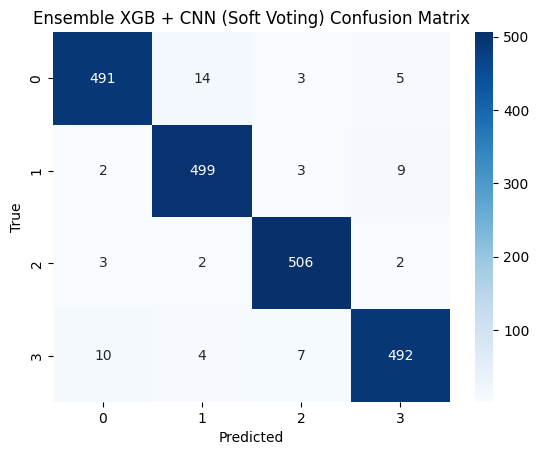


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       513
           1       0.96      0.97      0.97       513
           2       0.97      0.99      0.98       513
           3       0.97      0.96      0.96       513

    accuracy                           0.97      2052
   macro avg       0.97      0.97      0.97      2052
weighted avg       0.97      0.97      0.97      2052



In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load dataset
data = pd.read_csv('iot_network_analysis_dataset_10000.csv')

# Encode string labels
if data['Label'].dtype == 'object':
    label_encoder = LabelEncoder()
    data['Label'] = label_encoder.fit_transform(data['Label'])

# Features and target
X = data.drop('Label', axis=1)
y = data['Label']

# Convert bools to int
for col in X.columns:
    if X[col].dtype == 'bool':
        X[col] = X[col].astype(int)

# One-hot encode categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    print("Encoding categorical columns:", list(categorical_cols))
    X = pd.get_dummies(X, columns=categorical_cols)

# Apply SMOTE for class imbalance
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

# Split train-test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Prepare CNN input
X_train_cnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_cnn = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)
y_train_cnn = to_categorical(y_train)
y_test_cnn = to_categorical(y_test)

# Build CNN model
def build_cnn(input_shape, num_classes):
    model = Sequential()
    model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(128, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer=Adam(0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

cnn_model = build_cnn((X_train_cnn.shape[1], 1), y_train_cnn.shape[1])
history = cnn_model.fit(X_train_cnn, y_train_cnn, epochs=30, batch_size=32, validation_split=0.2, verbose=1)

# Predict CNN probabilities
cnn_probs = cnn_model.predict(X_test_cnn)
cnn_preds = np.argmax(cnn_probs, axis=1)

# Train RF and XGBoost
rf_model = RandomForestClassifier(n_estimators=300, max_depth=30, random_state=42)
xgb_model = XGBClassifier(n_estimators=300, learning_rate=0.1, max_depth=5,
                          use_label_encoder=False, eval_metric='mlogloss')

rf_model.fit(X_train_scaled, y_train)
xgb_model.fit(X_train_scaled, y_train)

# Predict with RF and XGBoost
rf_preds = rf_model.predict(X_test_scaled)
xgb_preds = xgb_model.predict(X_test_scaled)
rf_probs = rf_model.predict_proba(X_test_scaled)
xgb_probs = xgb_model.predict_proba(X_test_scaled)

# Weighted Soft Voting Ensemble Function
def weighted_ensemble(probs1, probs2, w1=0.8, w2=0.2):
    return np.argmax((w1 * probs1 + w2 * probs2), axis=1)

# Ensemble predictions (soft voting)
rf_cnn_ensemble = weighted_ensemble(rf_probs, cnn_probs, w1=0.95, w2=0.05)
xgb_cnn_ensemble = weighted_ensemble(xgb_probs, cnn_probs, w1=0.8, w2=0.2)

# Evaluation Function
def evaluate_model(name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='weighted')
    rec = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    print(f"\n{name} Performance:")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1 Score:  {f1:.4f}")
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

# Evaluate All Models
evaluate_model("CNN", y_test, cnn_preds)
evaluate_model("Random Forest", y_test, rf_preds)
evaluate_model("XGBoost", y_test, xgb_preds)
evaluate_model("Ensemble RF + CNN (Soft Voting)", y_test, rf_cnn_ensemble)
evaluate_model("Ensemble XGB + CNN (Soft Voting)", y_test, xgb_cnn_ensemble)
